In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.losses import MeanAbsoluteError

# Load model
model = load_model('air_v100.h5', custom_objects={'mae': MeanAbsoluteError()})

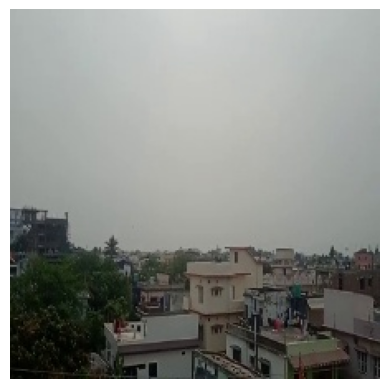

In [ ]:
# Get image and preprocess image
image_path = 'unhealthy.jpg'  # image path
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# show image
plt.imshow(load_img(image_path))
plt.axis('off')  # hide axis
plt.show()

In [ ]:
# Predict
predictions = model.predict(img_array)

# Seperate result
pm25_pred, pm10_pred, o3_pred, co_pred, so2_pred, no2_pred = [pred[0] for pred in predictions]

o3_pred = o3_pred / 1000
if(co_pred > 100):
  co_pred = co_pred / 100

print(f"PM2.5 預測值: {pm25_pred}")
print(f"PM10 預測值: {pm10_pred}")
print(f"O3 預測值: {o3_pred}")
print(f"CO 預測值: {co_pred}")
print(f"SO2 預測值: {so2_pred}")
print(f"NO2 預測值: {no2_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
PM2.5 預測值: [65.48061]
PM10 預測值: [94.31842]
O3 預測值: [0.07608788]
CO 預測值: [0.36055094]
SO2 預測值: [3.5813694]
NO2 預測值: [2.0077362]


<ipython-input-47-ff6cae59f7e4>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions = [float(pm25_pred), float(pm10_pred), float(o3_pred), float(co_pred), float(so2_pred), float(no2_pred)]


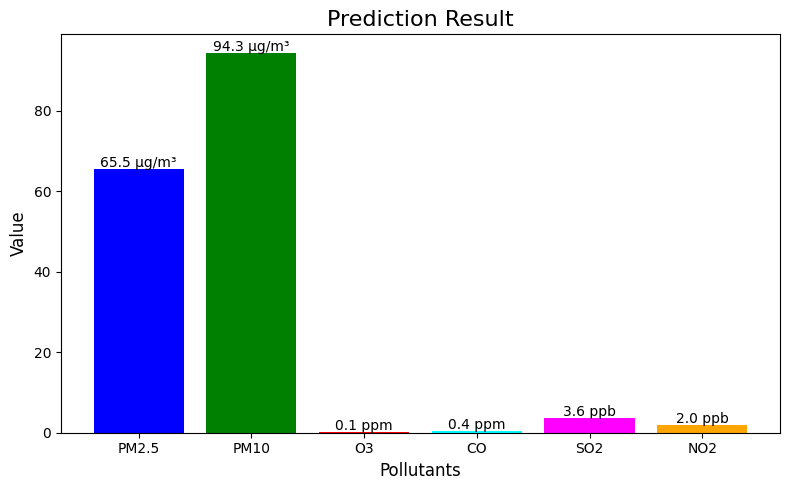

In [ ]:
import matplotlib.pyplot as plt

# Pollutants and units
pollutants = ['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']
units = ['μg/m³', 'μg/m³', 'ppm', 'ppm', 'ppb', 'ppb']

# Tranform into float
predictions = [float(pm25_pred), float(pm10_pred), float(o3_pred), float(co_pred), float(so2_pred), float(no2_pred)]

# Draw bar chart
plt.figure(figsize=(8, 5))
plt.bar(pollutants, predictions, color=['blue', 'green', 'red', 'cyan', 'magenta', 'orange'])

# Axis label and Title
plt.title('Prediction Result', fontsize=16)
plt.xlabel('Pollutants', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Show value
for i, (value, unit) in enumerate(zip(predictions, units)):
    plt.text(i, value + 0.5, f'{value:.1f} {unit}', ha='center', fontsize=10)

# Save graph
plt.tight_layout()
plt.savefig('pollution_predictions.png')

In [ ]:
# Show graph
plt.show()

In [ ]:
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        C_low, C_high, I_low, I_high = bp
        if C_low <= concentration <= C_high:
            return ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
    return 0  # If over the range，return 0

pm25_breakpoints = [
    (0.0, 15.4, 0, 50),       # Good
    (15.5, 35.4, 51, 100),    # Moderate
    (35.5, 54.4, 101, 150),   # USG
    (54.5, 150.4, 151, 200),  # Unhealthy
    (150.5, 250.4, 201, 300), # Very Unhealthy
    (250.5, 500.4, 301, 500)  # Severe
]

pm10_breakpoints = [
    (0.0, 50.0, 0, 50),       # Good
    (51.0, 100.0, 51, 100),    # Moderate
    (101.0, 254.0, 101, 150),   # USG
    (255.0, 354.0, 151, 200),  # Unhealthy
    (355.0, 424.0, 201, 300), # Very Unhealthy
    (425.0, 604.0, 301, 500)  # Severe
]

o3_breakpoints = [
    (0.0, 0.062, 0, 50),       # Good
    (0.63, 0.124, 51, 100),    # Moderate
    (0.125, 0.164, 101, 150),   # USG
    (0.165, 0.204, 151, 200),  # Unhealthy
    (0.205, 0.404, 201, 300), # Very Unhealthy
    (0.405, 0.604, 301, 500)  # Severe
]

co_breakpoints = [
    (0.0, 4.4, 0, 50),       # Good
    (4.5, 9.4, 51, 100),    # Moderate
    (9.5, 12.4, 101, 150),   # USG
    (12.5, 15.4, 151, 200),  # Unhealthy
    (15.5, 30.4, 201, 300), # Very Unhealthy
    (30.5, 50.4, 301, 500)  # Severe
]

so2_breakpoints = [
    (0.0, 20.0, 0, 50),       # Good
    (21.0, 75.0, 51, 100),    # Moderate
    (76.0, 185.0, 101, 150),   # USG
    (186.0, 304.0, 151, 200),  # Unhealthy
    (305.0, 604.0, 201, 300), # Very Unhealthy
    (605.0, 1004.0, 301, 500)  # Severe
]

no2_breakpoints = [
    (0.0, 30.0, 0, 50),       # Good
    (31.0, 100.0, 51, 100),    # Moderate
    (101.0, 360.0, 101, 150),   # USG
    (361.0, 649.0, 151, 200),  # Unhealthy
    (650.0, 1249.0, 201, 300), # Very Unhealthy
    (1250.0, 2049.0, 301, 500)  # Severe
]


def compute_overall_aqi(pm25, pm10, o3, co, so2, no2):
    aqi_pm25 = calculate_aqi(pm25, pm25_breakpoints)
    print(f"PM2.5 對應的 AQI: {aqi_pm25}")
    aqi_pm10 = calculate_aqi(pm10, pm10_breakpoints)
    print(f"PM10 對應的 AQI: {aqi_pm10}")
    aqi_o3 = calculate_aqi(o3, o3_breakpoints)
    print(f"O3 對應的 AQI: {aqi_o3}")
    aqi_co = calculate_aqi(co, co_breakpoints)
    print(f"CO 對應的 AQI: {aqi_co}")
    aqi_so2 = calculate_aqi(so2, so2_breakpoints)
    print(f"SO2 對應的 AQI: {aqi_so2}")
    aqi_no2 = calculate_aqi(no2, no2_breakpoints)
    print(f"NO2 對應的 AQI: {aqi_no2}")

    return max(aqi_pm25, aqi_pm10, aqi_o3, aqi_co, aqi_so2, aqi_no2)

overall_aqi = compute_overall_aqi(pm25_pred, pm10_pred, o3_pred, co_pred, so2_pred, no2_pred)
print(f"總體 AQI: {overall_aqi}")

PM2.5 對應的 AQI: [156.61053]
PM10 對應的 AQI: [94.31842]
O3 對應的 AQI: 0
CO 對應的 AQI: [4.09717]
SO2 對應的 AQI: [8.9534235]
NO2 對應的 AQI: [3.346227]
總體 AQI: [156.61053]


In [ ]:
def classify_aqi(overall_aqi):
    if overall_aqi <= 50:
        return 'Good'
    elif overall_aqi <= 100:
        return 'Moderate'
    elif overall_aqi <= 150:
        return 'USG'
    elif overall_aqi <= 200:
        return 'Unhealthy'
    elif overall_aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Severe'

aqi_class = classify_aqi(overall_aqi)
print("Predicted AQI Class: ", aqi_class)

Predicted AQI Class:  Unhealthy
